# EDA for ml-1m(Raw Data)

## Import libraries

In [1]:
#import libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

Released 2/2003

This dataset contains 3 files: "ratings.dat", "movies.dat" and "users.dat". I will explore these files.

## Rating Data

Rating Data includes 4 columns: UserID, MovieID, Rating and Timestamp

In [2]:
ratingsHeader = ["UserID", "MovieID", "Rating", "Timestamp"]

In [3]:
ratingsDF = pd.read_table('Raw Data/ratings.dat',sep = '::', names = ratingsHeader, engine = "python")

In [4]:
ratingsDF

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [5]:
ratingsDF.shape

(1000209, 4)

This dataset includes 1,000,209 Rating Records and no missing values.

In [6]:
ratingsDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
UserID       1000209 non-null int64
MovieID      1000209 non-null int64
Rating       1000209 non-null int64
Timestamp    1000209 non-null int64
dtypes: int64(4)
memory usage: 30.5 MB


Look at the distribution of rating values. It seems that users prefer to give 3, 4 and 5(more than 80%).

In [7]:
ratingsSE = ratingsDF.Rating

In [8]:
ratingsSE.describe()

count    1.000209e+06
mean     3.581564e+00
std      1.117102e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: Rating, dtype: float64

In [9]:
ratingsSE.value_counts()

4    348971
3    261197
5    226310
2    107557
1     56174
Name: Rating, dtype: int64

Text(0.5,1,'Distribution of Rating')

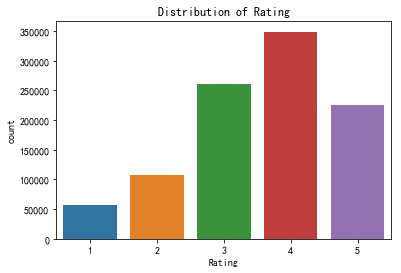

In [10]:
sns.countplot(x = "Rating", data = ratingsDF)
plt.title("Distribution of Rating")

## Movie Data

Movie Data includes 3 columns: MovieID, Title and Genres

In [11]:
moviesHeader = ["MovieID", "Title", "Genres"]

In [12]:
moviesDF = pd.read_table('Raw Data/movies.dat',sep = '::', names = moviesHeader, engine = "python")

In [13]:
moviesDF

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [14]:
moviesDF.shape

(3883, 3)

This dataset includes 3,883 Movies and no missing values.

In [15]:
moviesDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
MovieID    3883 non-null int64
Title      3883 non-null object
Genres     3883 non-null object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


Look at the distribution of genres

In [16]:
genresSE = moviesDF.Genres

In [17]:
genresCount = {}
for item in genresSE:
    itemList = item.split("|")
    for genre in itemList:
        if genresCount.get(genre) == None:
            genresCount[genre] = 1
        else:
            genresCount[genre] += 1

In [18]:
genresCountList = sorted(genresCount.items(), key=lambda d: d[1], reverse = True)

In [19]:
genres = []
count = []
for item in genresCountList:
    genres.append(item[0])
    count.append(item[1])

In [20]:
len(genres)

18

There are 18 different genres in this dataset: Action, Adventure, Animation, Children's, Comedy, Crime, Documentary, Drama, Fantasy,
Film-Noir, Horror, Musical, Mystery, Romance, Sci-Fi, Thriller, War, Western

Text(0,0.5,'Count')

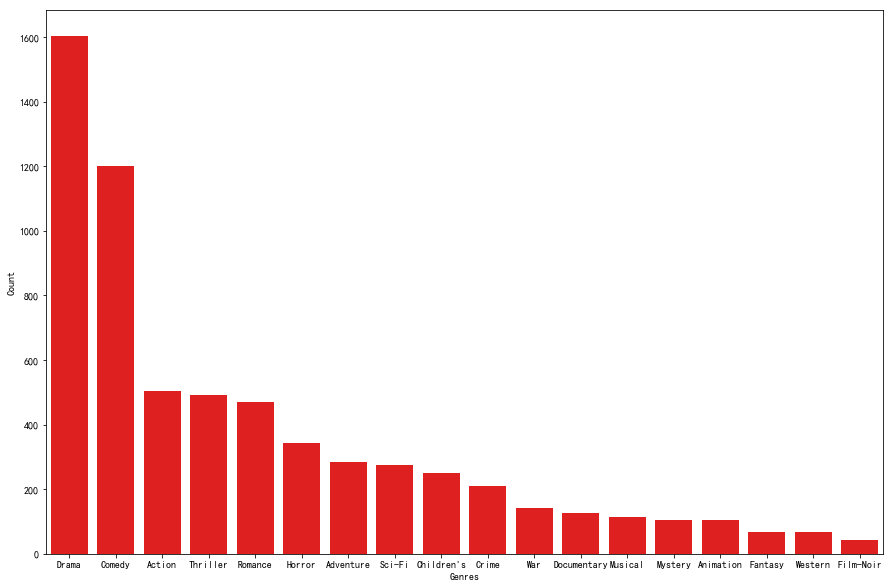

In [21]:
plt.figure(figsize=(15, 10))
sns.barplot(x = genres, y = count,color = 'r')
plt.xlabel("Genres")
plt.ylabel("Count")

## User Data

User Data includes 5 columns: UserID, Gender, Age, Occupation and Zip-code

In [22]:
usersHeader = ["UserID", "Gender", "Age", "Occupation", "Zip-code"]

Gender is denoted by a "M" for male and "F" for female
- Age is chosen from the following ranges:

	*  1:  "Under 18"
	* 18:  "18-24"
	* 25:  "25-34"
	* 35:  "35-44"
	* 45:  "45-49"
	* 50:  "50-55"
	* 56:  "56+"

- Occupation is chosen from the following choices:

	*  0:  "other" or not specified
	*  1:  "academic/educator"
	*  2:  "artist"
	*  3:  "clerical/admin"
	*  4:  "college/grad student"
	*  5:  "customer service"
	*  6:  "doctor/health care"
	*  7:  "executive/managerial"
	*  8:  "farmer"
	*  9:  "homemaker"
	* 10:  "K-12 student"
	* 11:  "lawyer"
	* 12:  "programmer"
	* 13:  "retired"
	* 14:  "sales/marketing"
	* 15:  "scientist"
	* 16:  "self-employed"
	* 17:  "technician/engineer"
	* 18:  "tradesman/craftsman"
	* 19:  "unemployed"
	* 20:  "writer"

In [23]:
usersDF = pd.read_table('Raw Data/users.dat',sep = '::', names = usersHeader, engine = "python")

In [24]:
usersDF

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [25]:
usersDF.shape

(6040, 5)

This dataset includes 6040 Users and no missing values.

In [26]:
usersDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
UserID        6040 non-null int64
Gender        6040 non-null object
Age           6040 non-null int64
Occupation    6040 non-null int64
Zip-code      6040 non-null object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


No missing values(NaN) in the whole dataset. 

Most of the users in this dataset are male.

Text(0.5,1,'Distribution of Gender')

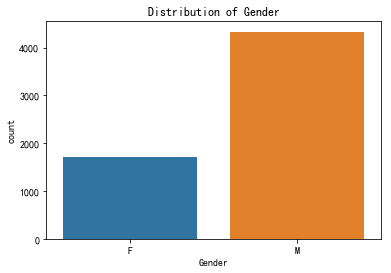

In [27]:
sns.countplot(x = "Gender", data = usersDF)
plt.title("Distribution of Gender")

Most of the users in this dataset are from 18 years old to 44 years old.

Text(0.5,1,'Distribution of Age')

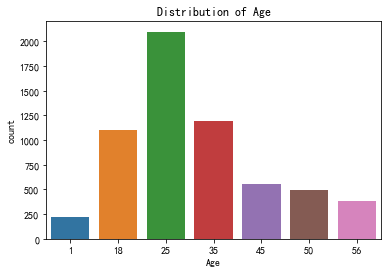

In [28]:
sns.countplot(x = "Age", data = usersDF)
plt.title("Distribution of Age")

Most of the users in this dataset are students, engineers, programmers and executive/managerials.

Text(0.5,1,'Distribution of Occupation')

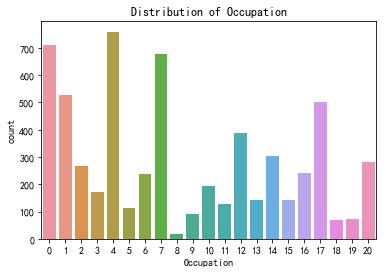

In [29]:
sns.countplot(x = "Occupation", data = usersDF)
plt.title("Distribution of Occupation")

## CITATION
To acknowledge use of the dataset in publications, please cite the following
paper:

F. Maxwell Harper and Joseph A. Konstan. 2015. The MovieLens Datasets: History
and Context. ACM Transactions on Interactive Intelligent Systems (TiiS) 5, 4,
Article 19 (December 2015), 19 pages. DOI=http://dx.doi.org/10.1145/2827872

SUMMARY
================================================================================

These files contain 1,000,209 anonymous ratings of approximately 3,900 movies 
made by 6,040 MovieLens users who joined MovieLens in 2000.

USAGE LICENSE
================================================================================

Neither the University of Minnesota nor any of the researchers
involved can guarantee the correctness of the data, its suitability
for any particular purpose, or the validity of results based on the
use of the data set.  The data set may be used for any research
purposes under the following conditions:

     * The user may not state or imply any endorsement from the
       University of Minnesota or the GroupLens Research Group.

     * The user must acknowledge the use of the data set in
       publications resulting from the use of the data set
       (see below for citation information).

     * The user may not redistribute the data without separate
       permission.

     * The user may not use this information for any commercial or
       revenue-bearing purposes without first obtaining permission
       from a faculty member of the GroupLens Research Project at the
       University of Minnesota.

If you have any further questions or comments, please contact GroupLens
<grouplens-info@cs.umn.edu>. 

CITATION
================================================================================

To acknowledge use of the dataset in publications, please cite the following
paper:

F. Maxwell Harper and Joseph A. Konstan. 2015. The MovieLens Datasets: History
and Context. ACM Transactions on Interactive Intelligent Systems (TiiS) 5, 4,
Article 19 (December 2015), 19 pages. DOI=http://dx.doi.org/10.1145/2827872


ACKNOWLEDGEMENTS
================================================================================

Thanks to Shyong Lam and Jon Herlocker for cleaning up and generating the data
set.

FURTHER INFORMATION ABOUT THE GROUPLENS RESEARCH PROJECT
================================================================================

The GroupLens Research Project is a research group in the Department of 
Computer Science and Engineering at the University of Minnesota. Members of 
the GroupLens Research Project are involved in many research projects related 
to the fields of information filtering, collaborative filtering, and 
recommender systems. The project is lead by professors John Riedl and Joseph 
Konstan. The project began to explore automated collaborative filtering in 
1992, but is most well known for its world wide trial of an automated 
collaborative filtering system for Usenet news in 1996. Since then the project 
has expanded its scope to research overall information filtering solutions, 
integrating in content-based methods as well as improving current collaborative 
filtering technology.

Further information on the GroupLens Research project, including research 
publications, can be found at the following web site:
        
        http://www.grouplens.org/

GroupLens Research currently operates a movie recommender based on 
collaborative filtering:

        http://www.movielens.org/

RATINGS FILE DESCRIPTION
================================================================================

All ratings are contained in the file "ratings.dat" and are in the
following format:

UserID::MovieID::Rating::Timestamp

- UserIDs range between 1 and 6040 
- MovieIDs range between 1 and 3952
- Ratings are made on a 5-star scale (whole-star ratings only)
- Timestamp is represented in seconds since the epoch as returned by time(2)
- Each user has at least 20 ratings

USERS FILE DESCRIPTION
================================================================================

User information is in the file "users.dat" and is in the following
format:

UserID::Gender::Age::Occupation::Zip-code

All demographic information is provided voluntarily by the users and is
not checked for accuracy.  Only users who have provided some demographic
information are included in this data set.

- Gender is denoted by a "M" for male and "F" for female
- Age is chosen from the following ranges:

	*  1:  "Under 18"
	* 18:  "18-24"
	* 25:  "25-34"
	* 35:  "35-44"
	* 45:  "45-49"
	* 50:  "50-55"
	* 56:  "56+"

- Occupation is chosen from the following choices:

	*  0:  "other" or not specified
	*  1:  "academic/educator"
	*  2:  "artist"
	*  3:  "clerical/admin"
	*  4:  "college/grad student"
	*  5:  "customer service"
	*  6:  "doctor/health care"
	*  7:  "executive/managerial"
	*  8:  "farmer"
	*  9:  "homemaker"
	* 10:  "K-12 student"
	* 11:  "lawyer"
	* 12:  "programmer"
	* 13:  "retired"
	* 14:  "sales/marketing"
	* 15:  "scientist"
	* 16:  "self-employed"
	* 17:  "technician/engineer"
	* 18:  "tradesman/craftsman"
	* 19:  "unemployed"
	* 20:  "writer"

MOVIES FILE DESCRIPTION
================================================================================

Movie information is in the file "movies.dat" and is in the following
format:

MovieID::Title::Genres

- Titles are identical to titles provided by the IMDB (including
year of release)
- Genres are pipe-separated and are selected from the following genres:

	* Action
	* Adventure
	* Animation
	* Children's
	* Comedy
	* Crime
	* Documentary
	* Drama
	* Fantasy
	* Film-Noir
	* Horror
	* Musical
	* Mystery
	* Romance
	* Sci-Fi
	* Thriller
	* War
	* Western

- Some MovieIDs do not correspond to a movie due to accidental duplicate
entries and/or test entries
- Movies are mostly entered by hand, so errors and inconsistencies may exist
